In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('./train.csv')


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
sum(titanic['Survived'])

342

In [10]:
titanic['PassengerId'].max()

891

In [13]:
(sum(titanic['Survived'])/titanic['PassengerId'].max())*100

38.38383838383838

In [22]:
titanic[titanic['Age'] == titanic['Age'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [21]:
titanic[titanic['Age'] == titanic['Age'].min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [24]:
titanic[titanic['Survived'] == 0][titanic[titanic['Survived'] == 0]['Age'] == titanic[titanic['Survived'] == 0]['Age'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [25]:
titanic[titanic['Survived'] == 0][titanic[titanic['Survived'] == 0]['Age'] == titanic[titanic['Survived'] == 0]['Age'].min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S


In [35]:
titanic.groupby(['Sex']).sum()['Survived']
sex_survived = titanic.groupby(['Sex']).sum()['Survived']
sex_survived

Sex
female    233
male      109
Name: Survived, dtype: int64

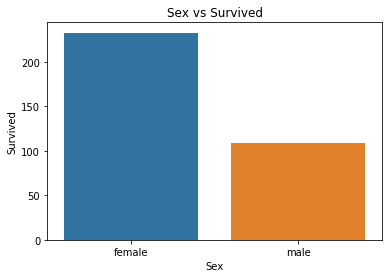

In [38]:
fig = sns.barplot(sex_survived.index, sex_survived.values)
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.title("Sex vs Survived")
plt.show(fig)

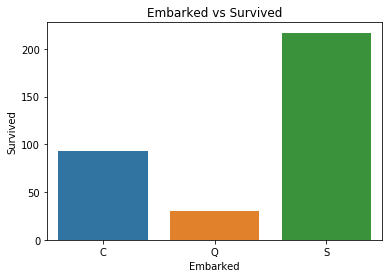

In [44]:
embarked_survived = titanic.groupby(['Embarked']).sum()['Survived']
fig = sns.barplot(embarked_survived.index, embarked_survived.values)
plt.xlabel("Embarked")
plt.ylabel("Survived")
plt.title("Embarked vs Survived")
plt.show(fig)

In [45]:
titanic[titanic['SibSp'] == titanic['SibSp'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [46]:
titanic[titanic['Parch'] == titanic['Parch'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S


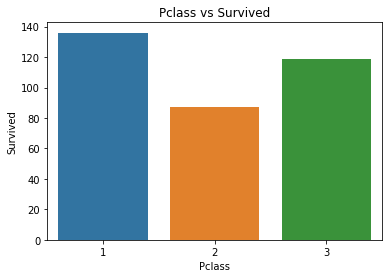

In [47]:
embarked_survived = titanic.groupby(['Pclass']).sum()['Survived']
fig = sns.barplot(embarked_survived.index, embarked_survived.values)
plt.xlabel("Pclass")
plt.ylabel("Survived")
plt.title("Pclass vs Survived")
plt.show(fig)

In [73]:
cabins = titanic.groupby(['Cabin']).sum()['Survived'] 
for cabins_name, value in cabins.items():
    if value == cabins.max():
        print("Cabin name = {}, survive number = {}".format(cabins_name, value))

Cabin name = B96 B98, survive number = 4
